# **Medical text knowledge graph**
# Dimitar Mileski

## Exploring RDF with Python methods

As a first example, we'll see how Python's built-in methods can be used to get and manipulate RDF. More specifically, we'll read RDF in the JSON-LD format, meaning we can use standard JSON manipulation to work with RDF data.

First, we need to install *matplotlib*, and do some housekeeping to prepare the necessary libraries. We then import *pyplot* and *Basemap*, for generating a geographical map.

In [ ]:
!pip install matplotlib

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
     / 149.7MB 96.6MB/s
     |████████████████████████████████| 6.5MB 4.4MB/s 
     |████████████████████████████████| 225kB 36.8MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759574 sha256=18b7c0e1ff111babba3f3f4469d75a7473f05f96d938710c8ae6b5ad0ac0c237
  Stored in directory: /tmp/pip-ephem-wheel-cache-g3m6ao77/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl

     |████████████████████████████████| 2.8MB 5.7MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702403 sha256=7e4e1b1366de66413b9beeffc7632faaf7f24e719b16a77deb7a9741fb40fbcd
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.0.1
    Uninstalling pyproj-3.0.1:
      Successfully uninstalled pyproj-3.0.1


We'll use these modules, used for HTTP requests and pretty printing, 
respectively.

In [ ]:
import requests, pprint

Set the parameters.

In [ ]:
url = "http://dbpedia.org/resource/Skopje"
headers = {'Accept': 'application/ld+json'}

Send an HTTP request to DBpedia and get the graph for *Medicine* in JSON-LD. Here, the content negotiation is explicit, by using the 'Accept' header.

In [ ]:
r = requests.get(url, headers=headers)
result = r.json()

The 'result' variable is a dictionary with one key-value pair, where the key is '@graph'. The value is then a list of size 1, so we need to select its content using index '0'. The 'attributes' variable then represents a dictionary, with 216 key-value pairs in this example.

In [ ]:
attributes = result.get('@graph')[0]

We can print out the content of the 'attributes' dictionary.

In [ ]:
pprint.pprint(attributes)

{'@id': 'http://dbpedia.org/resource/Skopje',
 '@type': ['http://www.w3.org/2002/07/owl#Thing',
           'http://www.w3.org/2003/01/geo/wgs84_pos#SpatialThing',
           'http://schema.org/City',
           'http://schema.org/Place',
           'http://www.wikidata.org/entity/Q486972',
           'http://www.wikidata.org/entity/Q515',
           'http://dbpedia.org/ontology/Place',
           'http://dbpedia.org/ontology/Location',
           'http://dbpedia.org/ontology/PopulatedPlace',
           'http://dbpedia.org/class/yago/WikicatCitiesInTheRepublicOfMacedonia',
           'http://dbpedia.org/class/yago/WikicatFormerCapitalsOfBulgaria',
           'http://dbpedia.org/class/yago/Seat108647945',
           'http://dbpedia.org/class/yago/WikicatCapitalsInEurope',
           'http://dbpedia.org/ontology/City',
           'http://dbpedia.org/class/yago/Capital108518505',
           'http://dbpedia.org/class/yago/Center108523483',
           'http://dbpedia.org/ontology/Settlement'

We can select specific properties for the resource 'Medicine', based on the RDF predicates used in the RDF graph.

In [ ]:
geo = "http://www.w3.org/2003/01/geo/wgs84_pos#"
lat = attributes.get(geo + 'lat')
lon = attributes.get(geo + 'long')

In [ ]:
print(lat)

None


Some attributes can be harder to parse, because they are not simple values.

In [ ]:
name = attributes['http://xmlns.com/foaf/0.1/name'][0]['@value']

KeyError: ignored

In [ ]:
print('City:', name)
print('Latitude:', lat)
print('Longitude:', lon)

Here, we create the figure and the map. Then, we add Skopje's location on top of the map.

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=lat, lon_0=lon,)
m.etopo(scale=0.5, alpha=0.5)

# Now we map the (lon, lat) of Skopje to (x, y), and add them on the map.
x, y = m(lon, lat)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Skopje', fontsize=12);

## Manipulating RDF with RDFLib

Next, we'll see how we can use *RDFLib* for manipulating RDF. *RDFLib* is to Python what *Apache Jena* is to Java.

We'll use the *RDFLib* module to manipulate RDF.

In [ ]:
!pip install rdflib

from rdflib import Graph, URIRef, Literal
from rdflib.namespace import RDFS, FOAF

In [ ]:
pip install plotly-express

Set the parameters.

In [ ]:
url = "http://dbpedia.org/resource/Medicine"

We create a new Graph. Then we load the content represented by the 'url' variable. With this, the 'parse()' method issues a HTTP GET request, and gets the RDF data for the resource. This is possible due to an implicit content negotiation, which the method itself implements and uses.

In [ ]:
g = Graph()
g.parse(url)

We create two new entities: one for Skopje, and another for FINKI. We create a new predicate, depicting a 'dbo:location' relation. We also create a literal: the full title of FINKI.

In [ ]:
skopje = URIRef(url)
finki = URIRef("http://finki.ukim.mk/")
location = URIRef("http://dbpedia.org/ontology/location")
name = Literal("Faculty of Computer Science and Engineering, Skopje")

Check the number of triples in the Graph.

In [ ]:
print("Initial length:", len(g))

Then, we create two new RDF statements (RDF triples). The first one denotes Skopje as a location of FINKI, and the second one provides the name of the FINKI entity.

In [ ]:
g.add( (finki, location, skopje) )
g.add( (finki, RDFS.label, name) )

Check the number of triples in the Graph, after the new RDF triples.

In [ ]:
print("New length:", len(g))

Print the entire Graph using Turtle syntax.

In [ ]:
print(g.serialize(format='turtle'))

Traverse all RDF triples with the '?s rdfs:label ?o' triple pattern.

In [ ]:
for s,p,o in g.triples((None, RDFS.label, None)):
    print(s,p,o)

Select all ?p predicates, using the '?s ?p ?o' triple pattern.

In [ ]:
predicates = g.predicates(subject=None, object=None)
for predicate in predicates:
    print(predicate)

Access a specific value from the graph, specifying the subject and the predicate.

In [ ]:
medicine = URIRef("https://dbpedia.org/resource/Medicine")
name = g.value(subject=medicine, predicate=RDFS.label)
print("Medicine :", name)

Access a set of values (objects) from the graph, specifying the subject and the predicate.

In [ ]:
names = g.objects(subject=skopje, predicate=FOAF.name)
print ("All name variants of Skopje:")
for name in names:
    print("\t", name)

## Statistics over Linked Data

Here we'll see how we can use standard data analytics over RDF data, via *Pandas*. Pandas is a library for data manipulation and analysis, especially useful for numeric table data.

We'll use Pandas and URLLib.

In [ ]:
import pandas as pd, urllib
from pandas.plotting import scatter_matrix

We set the display format for float values.

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

Set the parameters.

# Medicine - Dbpedia

In [ ]:
query = """
select distinct ?predicate ?object
where {
dbr:Medicine ?predicate ?object
}
LIMIT 100
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

We read the data from the SPARQL endpoint using it as a REST service. The data is returned in CSV, through implicit content negotiation, and is loaded directly using Pandas.

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

# Medicine property - sameAs

In [ ]:
query = """
select distinct ?object
where {
dbr:Medicine owl:sameAs ?object
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                          object
0             http://rdf.freebase.com/ns/m.04sh3
1                 http://d-nb.info/gnd/4038243-6
2           http://fa.dbpedia.org/resource/پزشکی
3       http://war.dbpedia.org/resource/Medisina
4     http://jv.dbpedia.org/resource/Kedhokteran
..                                           ...
116      http://eo.dbpedia.org/resource/Medicino
117      http://ru.dbpedia.org/resource/Медицина
118      http://als.dbpedia.org/resource/Medizin
119  http://qu.dbpedia.org/resource/Hampi_yachay
120     http://scn.dbpedia.org/resource/Midicina

[121 rows x 1 columns]


# Medicine property - academicDiscipline

In [ ]:
query = """
select distinct ?subject
where {
 ?subject dbo:academicDiscipline dbr:Medicine .
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.

param = urllib.parse.urlencode({'query': query})

In [ ]:
query = """
select distinct ?person ?name ?birthPlace ?birthLat ?birthLong ?deathPlace ?deathLat ?deathLong 
where { ?person dbo:academicDiscipline  dbr:Medicine ;
                           dbo:birthPlace ?birthPlace ;
                           dbo:deathPlace ?deathPlace ;
                           dbp:name ?name .
                       ?birthPlace  geo:lat ?birthLat ;
                         geo:long ?birthLong .
                       ?deathPlace geo:lat ?deathLat ;
                                            geo:long ?deathLong .
}

"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                                 person  ... deathLong
0                http://dbpedia.org/resource/Love_Gantt  ...  -75.1636
1     http://dbpedia.org/resource/Ludolph_Christian_...  ...    7.1000
2     http://dbpedia.org/resource/Ludolph_Christian_...  ...    7.5500
3           http://dbpedia.org/resource/Luigi_Ferrarese  ...   14.2564
4           http://dbpedia.org/resource/Luigi_Ferrarese  ...   14.2583
...                                                 ...  ...       ...
1239      http://dbpedia.org/resource/William_Bleckwenn  ...  -81.7167
1240      http://dbpedia.org/resource/William_Bleckwenn  ...  -81.7167
1241  http://dbpedia.org/resource/Albert_Ludwig_Sige...  ...   17.0333
1242  http://dbpedia.org/resource/Charles_Russell_Ba...  ...  -89.5000
1243  http://dbpedia.org/resource/Michael_Brown_(phy...  ...    0.0630

[1244 rows x 8 columns]


# Birht place of people which Medicine is their academic discipline

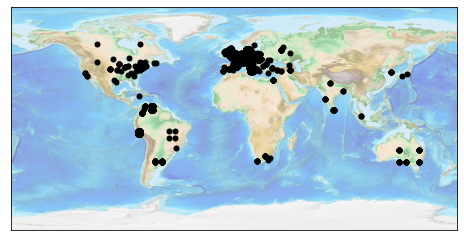

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.etopo(scale=0.5, alpha=0.5)

for index, row in data.iterrows():
    x, y = m(row['birthLong'], row['birthLat'])
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, row['name'], fontsize=12);
    plt.text(x, y, '', fontsize=12);

# Death place of people which Medicine is their academic discipline

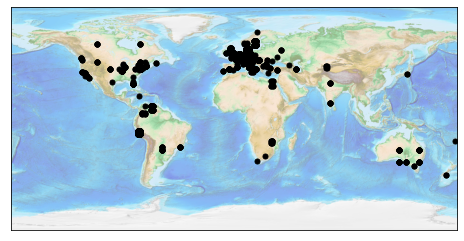

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.etopo(scale=0.5, alpha=0.5)

for index, row in data.iterrows():
    x, y = m(row['deathLong'], row['deathLat'])
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, row['name'], fontsize=12);
    plt.text(x, y, '', fontsize=12);

# Medicine property - activeSector

In [ ]:
query = """
select distinct ?subject
where {
 ?subject dbp:activitySector dbr:Medicine
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                              subject
0    http://dbpedia.org/resource/Physicians_in_Canada
1       http://dbpedia.org/resource/Pneumovesicoscopy
2               http://dbpedia.org/resource/Dentistry
3   http://dbpedia.org/resource/Mid-level_practiti...
4             http://dbpedia.org/resource/Gynaecology
5   http://dbpedia.org/resource/Respiratory_therapist
6   http://dbpedia.org/resource/Cardiothoracic_sur...
7     http://dbpedia.org/resource/Emergency_physician
8   http://dbpedia.org/resource/Oral_and_maxillofa...
9             http://dbpedia.org/resource/Pulmonology
10          http://dbpedia.org/resource/Urogynecology
11             http://dbpedia.org/resource/Cardiology
12       http://dbpedia.org/resource/Gastroenterology
13                http://dbpedia.org/resource/Urology
14           http://dbpedia.org/resource/Rheumatology
15     http://dbpedia.org/resource/Addiction_medicine
16   http://dbpedia.org/resource/Addiction_psychiatry
17            http://dbpedia

# Medicine property - discipline

In [ ]:
query = """
select distinct  ?name ?impactFactor ?openAccess
where { 
?Thing dbp:discipline dbr:Medicine ;
           dbo:impactFactor ?impactFactor ;
          dbo:openAccessContent ?openAccess ;
           foaf:name ?name .
           
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                                 name  ...                          openAccess
0                              Malawi Medical Journal  ...                                 Yes
1          American Journal of Translational Research  ...                                 Yes
2                     Genetics and Molecular Research  ...                                 Yes
3                                        EBioMedicine  ...                                 Yes
4                European Journal of Medical Research  ...                                 Yes
5                            Acta Medica Mediterranea  ...                                 Yes
6                                   JAMA Network Open  ...                                 Yes
7                     Sexually Transmitted Infections  ...  Hybrid option available to authors
8               The National Medical Journal of India  ...                                 Yes
9                                       Open Medic

# Impact factor of medical jurnals

In [ ]:
import plotly.express as px

fig = px.line(x=data['name'], y=data['impactFactor'], title="Impact factor")
print(fig)
fig.show()

Figure({
    'data': [{'hoverlabel': {'namelength': 0},
              'hovertemplate': 'x=%{x}<br>y=%{y}',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['Malawi Medical Journal', 'American Journal of Translational Research',
                          'Genetics and Molecular Research', 'EBioMedicine',
                          'European Journal of Medical Research', 'Acta Medica Mediterranea',
                          'JAMA Network Open', 'Sexually Transmitted Infections',
                          'The National Medical Journal of India', 'Open Medicine',
                          'International Journal of Medical Sciences', 'JAMA',
                          'Journal of Experimental Medicine',
                          'Journal of the Royal Society of Medicine',
                          'B

# Which of the medical jurnals have open access along with their imapct factor

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Load dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.3f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.3f" % df.High.max(),
                         ax=0, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.3f" % df.Low.mean(),
                        ax=0, ay=40),
                   dict(x=df.High.idxmin(),
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.3f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Yahoo")

fig.show()

# Medicine property - industryof

In [ ]:
query = """
select distinct ?subject
where {
 ?subject dbp:industry dbr:Medicine
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                              subject
0   http://dbpedia.org/resource/ATI_425_Titanium_A...
1               http://dbpedia.org/resource/Pulmocide
2                  http://dbpedia.org/resource/MDsave
3     http://dbpedia.org/resource/Chi_Mei_Corporation
4           http://dbpedia.org/resource/KP_Technology
5   http://dbpedia.org/resource/Alberta_College_of...
6   http://dbpedia.org/resource/Society_for_Vascul...
7   http://dbpedia.org/resource/New_York_County_Me...
8   http://dbpedia.org/resource/American_Associati...
9   http://dbpedia.org/resource/American_Glaucoma_...
10  http://dbpedia.org/resource/American_Society_o...
11  http://dbpedia.org/resource/Association_of_Ame...
12                 http://dbpedia.org/resource/ResMed
13            http://dbpedia.org/resource/Respironics
14                   http://dbpedia.org/resource/AAGL
15  http://dbpedia.org/resource/Commission_on_Accr...
16        http://dbpedia.org/resource/Zinda_Tilismath
17  http://dbpedia.org/resou

Some companies may have multiple values for 'revenue' or 'number of employees', so we need to remove all duplicates.

In [ ]:
data = data.drop_duplicates(subset='company')
print(data)

                                                company  ...                                           industry
0           http://dbpedia.org/resource/Arthur_Andersen  ...                    http://dbpedia.org/resource/Tax
4             http://dbpedia.org/resource/Bunge_Limited  ...  http://dbpedia.org/resource/Food_processing_in...
5                   http://dbpedia.org/resource/Cadbury  ...          http://dbpedia.org/resource/Confectionery
6     http://dbpedia.org/resource/Hyundai_Motor_Company  ...    http://dbpedia.org/resource/Automotive_industry
7       http://dbpedia.org/resource/Olympus_Corporation  ...            http://dbpedia.org/resource/Electronics
...                                                 ...  ...                                                ...
1956          http://dbpedia.org/resource/Grupo_Nutresa  ...        http://dbpedia.org/resource/Food_processing
1957      http://dbpedia.org/resource/Helmerich_&_Payne  ...               http://dbpedia.org/resource/O

Now we can manipulate with the data in a regular Pandas manner. Here, we print the first two rows of the DataFrame, with these 3 specific columns only.

In [ ]:
data[['name','numEmployees','revenue']].head(3)

,name,numEmployees,revenue
0,Arthur Andersen,85000,"9,300,000,000"
4,Bunge Limited,35000,"57,828,000,000"
5,Cadbury UK Limited,71657,"11,346,002,000"


To view the statistics for any column of the DataFrame, we can use these Pandas methods.

In [ ]:
data.revenue.describe()

count            1,322
mean    13,241,691,815
std     16,688,478,101
min            547,164
25%      3,102,500,000
50%      7,000,000,000
75%     15,990,500,000
max     98,917,000,000
Name: revenue, dtype: float64

Histogram for all numeric values in the DataFrame, i.e. 'revenue' and 'numEmployees'. We use 'bins=20' to specify the number of stacks to 20, instead of the default 10.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b3938d940>,
      dtype=object)

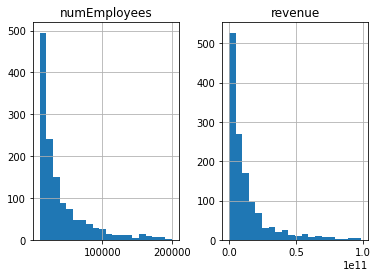

In [ ]:
data.hist(bins=20)

Bar plot for the 'revenue' values, on a DataFrame sorted by 'revenue'.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22826 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24335 missing from current font.
  font.set_

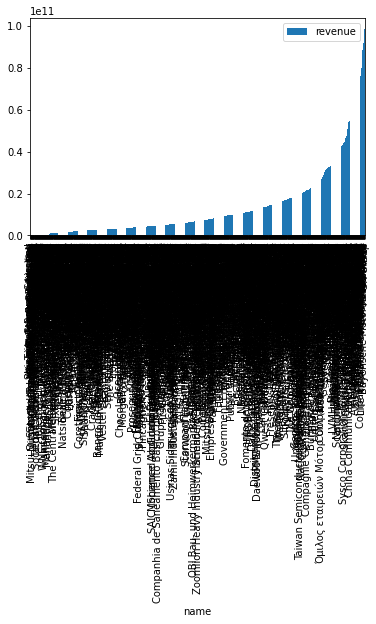

In [ ]:
data.sort_values(by='revenue')[['name','revenue']].plot.bar(x='name')

Scatter plot representing the number of employees on one axis, and the revenue on the other.

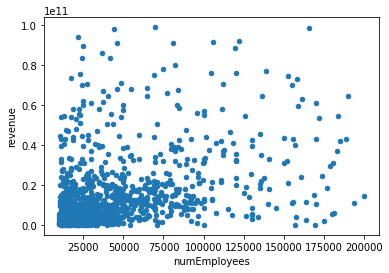

In [ ]:
data.plot.scatter(x='numEmployees', y='revenue')

When two or more numerical columns exist in the DataFrame, we can plot all pairs of columns on separate plots, grouped together on a single figure. On the diagonal, where the same column is plotted on both axis, we use 'kde' which produces a histogram plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b3a582ef0>,
      dtype=object)

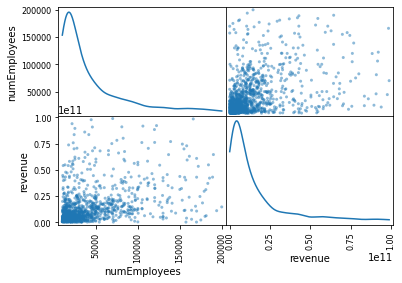

In [ ]:
scatter_matrix(data, diagonal='kde')

The selected companies have an 'industry' value. We can use it to group them by industry, where all numerical values ('revenue' and 'numEmployees') per a company in a given industry will be summarized.

In [ ]:
grouped = data.groupby('industry').sum()
print(grouped)

                                                    numEmployees         revenue
industry                                                                        
http://dbpedia.org/resource/Accountancy                    19000   1,900,000,000
http://dbpedia.org/resource/Accounting                     64303   7,300,000,000
http://dbpedia.org/resource/Aerospace                      90800  47,760,000,000
http://dbpedia.org/resource/Aerospace_engineering         270256  83,669,000,000
http://dbpedia.org/resource/Aerospace_manufacturer         84000  29,126,000,000
...                                                          ...             ...
http://dbpedia.org/resource/Wealth_management              14500  16,720,000,000
http://dbpedia.org/resource/Wholesale                     147000  76,010,000,000
http://dbpedia.org/resource/Window_covering                16000   2,600,000,000
http://dbpedia.org/resource/Wireless                      141089 116,866,000,000
http://dbpedia.org/resource/

Now we can make a scatter plot over the grouped DataFrame which contains 371 industries, with summarized values for 'numEmployees' and 'revenue'.

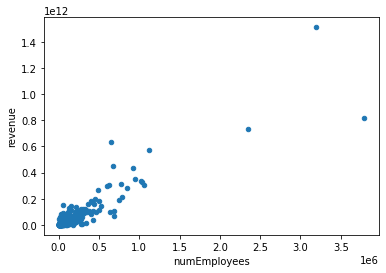

In [ ]:
grouped.plot.scatter(x='numEmployees', y='revenue')

A scatter matrix for the industries.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b274c4780>,
      dtype=object)

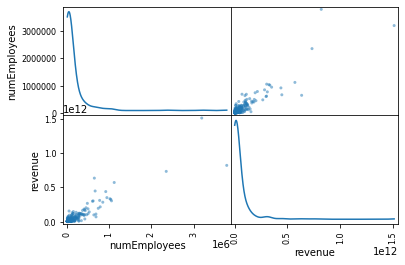

In [ ]:
scatter_matrix(grouped, diagonal='kde')

In [ ]:
grouped.revenue.describe()

count                 371
mean       47,184,680,808
std       121,508,852,505
min               547,164
25%         3,941,150,000
50%        10,402,000,000
75%        32,950,000,000
max     1,511,109,755,575
Name: revenue, dtype: float64

## Clustering over Linked Data

As a final example, we'll use clustering over RDF data in order to determine similar entities based on their characteristics. We'll continue with the domain of companies selected from DBpedia.

We'll use Pandas, URLLib, MatPlotLib and SciKit.

In [ ]:
import pandas as pd, urllib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering,AffinityPropagation
from sklearn.mixture import GaussianMixture

Set the parameters.

In [ ]:
query = """
SELECT ?company ?numEmployees ?revenue ?name ?wikipage ?industry
WHERE {
    ?company dbo:industry ?industry ;
             dbo:numberOfEmployees ?numEmployees ;
             dbo:revenue ?revenue ;
             foaf:name ?name ;
             foaf:isPrimaryTopicOf ?wikipage .
    FILTER (?numEmployees > 10000 && ?numEmployees < 200000)
    FILTER (xsd:integer(?revenue) > 500000 && 
            xsd:integer(?revenue) < 100000000000)
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org',
                                'query': query,
                                'format': 'text/csv'})

We read the data from the SPARQL endpoint using it as a REST service. The data is returned in CSV, through implicit content negotiation, and is loaded directly using Pandas.

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                                company  ...                                           industry
0           http://dbpedia.org/resource/Arthur_Andersen  ...                    http://dbpedia.org/resource/Tax
1           http://dbpedia.org/resource/Arthur_Andersen  ...             http://dbpedia.org/resource/Consultant
2           http://dbpedia.org/resource/Arthur_Andersen  ...             http://dbpedia.org/resource/Accounting
3           http://dbpedia.org/resource/Arthur_Andersen  ...  http://dbpedia.org/resource/Professional_services
4             http://dbpedia.org/resource/Bunge_Limited  ...  http://dbpedia.org/resource/Food_processing_in...
...                                                 ...  ...                                                ...
1956          http://dbpedia.org/resource/Grupo_Nutresa  ...        http://dbpedia.org/resource/Food_processing
1957      http://dbpedia.org/resource/Helmerich_&_Payne  ...               http://dbpedia.org/resource/O

Some companies may have multiple values for 'revenue' or 'number of employees', so we need to remove all duplicates.

In [ ]:
data = data.drop_duplicates(subset='company')
print(data)

                                                company  ...                                           industry
0           http://dbpedia.org/resource/Arthur_Andersen  ...                    http://dbpedia.org/resource/Tax
4             http://dbpedia.org/resource/Bunge_Limited  ...  http://dbpedia.org/resource/Food_processing_in...
5                   http://dbpedia.org/resource/Cadbury  ...          http://dbpedia.org/resource/Confectionery
6     http://dbpedia.org/resource/Hyundai_Motor_Company  ...    http://dbpedia.org/resource/Automotive_industry
7       http://dbpedia.org/resource/Olympus_Corporation  ...            http://dbpedia.org/resource/Electronics
...                                                 ...  ...                                                ...
1956          http://dbpedia.org/resource/Grupo_Nutresa  ...        http://dbpedia.org/resource/Food_processing
1957      http://dbpedia.org/resource/Helmerich_&_Payne  ...               http://dbpedia.org/resource/O

We create a method for [K-Means clustering](https://en.wikipedia.org/wiki/K-means_clustering), to simply wrap the process in a single method call.

In [ ]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

We create a new DataFrame with only two columns: 'revenue' and 'numEmployees'.

In [ ]:
datashort = data[['revenue','numEmployees']]
print(datashort)

            revenue  numEmployees
0     9,300,000,000         85000
4    57,828,000,000         35000
5    11,346,002,000         71657
6    76,000,000,000        104731
7           847,105         39727
...             ...           ...
1956  2,900,000,000         31650
1957  3,720,000,000         11914
1958  3,500,000,000         24000
1959  2,076,500,000         17427
1960  5,700,000,000         23000

[1322 rows x 2 columns]


We perform the clustering, using 5 clusters.

In [ ]:
clust_labels, cent = doKmeans(datashort, 5)
kmeans = pd.DataFrame(clust_labels)

# We insert the clustering data into our DataFrame
datashort.insert((datashort.shape[1]),'kmeans',kmeans)
print(datashort)

            revenue  numEmployees  kmeans
0     9,300,000,000         85000       0
4    57,828,000,000         35000       0
5    11,346,002,000         71657       0
6    76,000,000,000        104731       0
7           847,105         39727       0
...             ...           ...     ...
1956  2,900,000,000         31650     nan
1957  3,720,000,000         11914     nan
1958  3,500,000,000         24000     nan
1959  2,076,500,000         17427     nan
1960  5,700,000,000         23000     nan

[1322 rows x 3 columns]


Now we plot the companies on a scatter plot, adding color to represent the cluster each company belongs to.

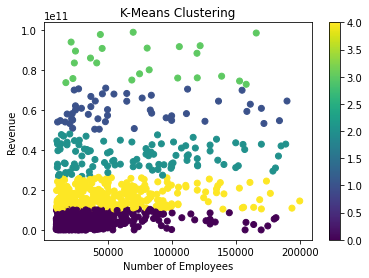

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(datashort['numEmployees'],
                     datashort['revenue'],c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Revenue')
plt.colorbar(scatter)

Next, we create a method for [Agglomerative clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

In [ ]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, 
                                    affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

We re-create the short DataFrame with only two columns: 'revenue' and 'numEmployees'.

In [ ]:
datashort = data[['revenue','numEmployees']]
print(datashort)

            revenue  numEmployees
0     9,300,000,000         85000
4    57,828,000,000         35000
5    11,346,002,000         71657
6    76,000,000,000        104731
7           847,105         39727
...             ...           ...
1956  2,900,000,000         31650
1957  3,720,000,000         11914
1958  3,500,000,000         24000
1959  2,076,500,000         17427
1960  5,700,000,000         23000

[1322 rows x 2 columns]


We perform the clustering, using 5 clusters.

In [ ]:
clust_labels1 = doAgglomerative(datashort, 5)
agglomerative = pd.DataFrame(clust_labels1)

# We insert the clustering data into our DataFrame
datashort.insert((datashort.shape[1]),'agglomerative',agglomerative)
print(datashort)

            revenue  numEmployees  agglomerative
0     9,300,000,000         85000              0
4    57,828,000,000         35000              2
5    11,346,002,000         71657              2
6    76,000,000,000        104731              2
7           847,105         39727              2
...             ...           ...            ...
1956  2,900,000,000         31650            nan
1957  3,720,000,000         11914            nan
1958  3,500,000,000         24000            nan
1959  2,076,500,000         17427            nan
1960  5,700,000,000         23000            nan

[1322 rows x 3 columns]


Now we plot the companies on a scatter plot, adding color to represent the cluster each company belongs to.

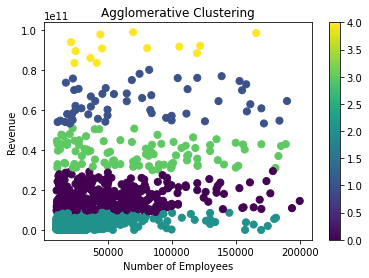

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(datashort['numEmployees'],
                     datashort['revenue'],c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Revenue')
plt.colorbar(scatter)

We create a method for [Affinity propagation](https://en.wikipedia.org/wiki/Affinity_propagation).

In [ ]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.9, 
                                max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

We re-create the short DataFrame with only two columns: 'revenue' and 'numEmployees'.

In [ ]:
datashort = data[['revenue','numEmployees']]
print(datashort)

            revenue  numEmployees
0     9,300,000,000         85000
4    57,828,000,000         35000
5    11,346,002,000         71657
6    76,000,000,000        104731
7           847,105         39727
...             ...           ...
1956  2,900,000,000         31650
1957  3,720,000,000         11914
1958  3,500,000,000         24000
1959  2,076,500,000         17427
1960  5,700,000,000         23000

[1322 rows x 2 columns]


We perform the clustering.

In [ ]:
clust_labels2, cent2 = doAffinity(datashort)
affinity = pd.DataFrame(clust_labels2)

# We insert the clustering data into our DataFrame.
datashort.insert((datashort.shape[1]),'affinity',affinity)
print(datashort)

            revenue  numEmployees  affinity
0     9,300,000,000         85000         1
4    57,828,000,000         35000        13
5    11,346,002,000         71657        19
6    76,000,000,000        104731         6
7           847,105         39727        23
...             ...           ...       ...
1956  2,900,000,000         31650       nan
1957  3,720,000,000         11914       nan
1958  3,500,000,000         24000       nan
1959  2,076,500,000         17427       nan
1960  5,700,000,000         23000       nan

[1322 rows x 3 columns]


Now we plot the companies on a scatter plot, adding color to represent the cluster each company belongs to.

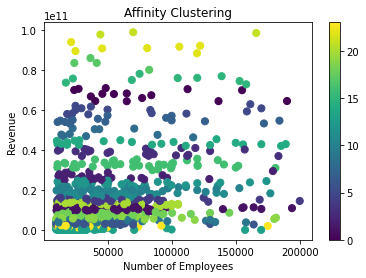

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(datashort['numEmployees'],
                     datashort['revenue'],c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Revenue')
plt.colorbar(scatter)

We create a method for [Gaussian mixtures](https://en.wikipedia.org/wiki/Mixture_model).

In [ ]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

We re-create the short DataFrame with only two columns: 'revenue' and 'numEmployees'.

In [ ]:
datashort = data[['revenue','numEmployees']]
print(datashort)

            revenue  numEmployees
0     9,300,000,000         85000
4    57,828,000,000         35000
5    11,346,002,000         71657
6    76,000,000,000        104731
7           847,105         39727
...             ...           ...
1956  2,900,000,000         31650
1957  3,720,000,000         11914
1958  3,500,000,000         24000
1959  2,076,500,000         17427
1960  5,700,000,000         23000

[1322 rows x 2 columns]


We perform the clustering.

In [ ]:
clust_labels3 = doGMM(datashort,5)
gmm = pd.DataFrame(clust_labels3)

# We insert the clustering data into our DataFrame.
datashort.insert((datashort.shape[1]),'gmm',gmm)
print(datashort)

            revenue  numEmployees  gmm
0     9,300,000,000         85000    1
4    57,828,000,000         35000    3
5    11,346,002,000         71657    3
6    76,000,000,000        104731    0
7           847,105         39727    1
...             ...           ...  ...
1956  2,900,000,000         31650  nan
1957  3,720,000,000         11914  nan
1958  3,500,000,000         24000  nan
1959  2,076,500,000         17427  nan
1960  5,700,000,000         23000  nan

[1322 rows x 3 columns]


Now we plot the companies on a scatter plot, adding color to represent the cluster each company belongs to.

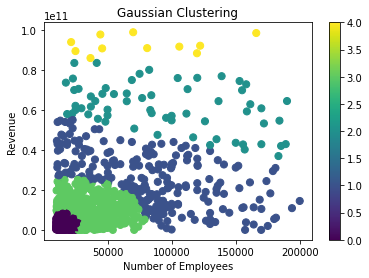

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(datashort['numEmployees'],
                     datashort['revenue'],c=gmm[0],s=50)
ax.set_title('Gaussian Clustering')
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Revenue')
plt.colorbar(scatter)